# Tarea 12

Fecha de entrega: 4/Octubre/2017

Por _Diana López Angeles_

In [1]:
using PyPlot

In [2]:
#Las funciones con las que vamos a hacer nuestras pruebas, solo para checar si lo que hacemos esta bien :D

function q(x,t)
    exp.(-5t/2)
end;

function f(x,t)
    -(2.5)*x
end;

function df(x,t)
    -2.5
end;

__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

In [3]:
#Usamos el metodo de Newton que hicimos en una tarea anterior:

function metodo_newton_arbitrario(f,df,x0,listt)
    x = x0
    for i in 1:100                             
        x=x-(f(x)/df(x))                       
    end
return x
end;

In [4]:
#Ahora hacemos nuestro metodo de euler y vamos a necesitar del de Newton:

function euler_implicito(f,df,x0,t0,tf,h)
    n=round((tf-t0)/h)+1                 
    listt=linspace(t0,tf,n)
    listx = zeros(length(listt))
    x = x0 
    listx[1] = x0
    for i in 2:length(listt)
        g(x) = x - listx[i-1] - h*f(x,listt[i])
        dg(x) = 1 - h*df(x,listt[i])
        x = metodo_newton_arbitrario(g,dg,listx[i-1],listt[i])
        listx[i] = x
    end
    return listt,listx
end;

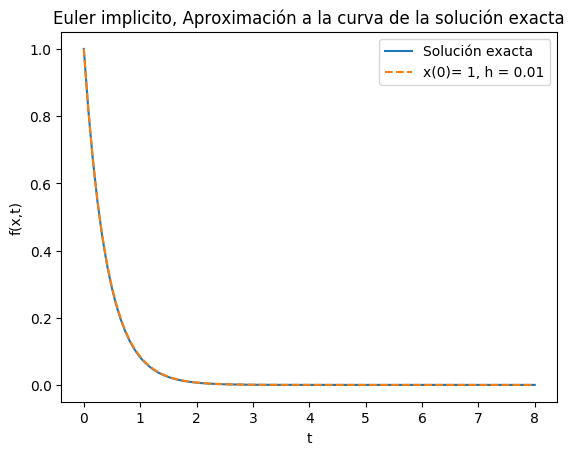

In [5]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(x,t)")
title("Euler implicito, Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(euler_implicito(f,df,1,0,8,0.01)[1],euler_implicito(f,df,1,0,8,0.01)[2],"--", label = "x(0)= 1, h = 0.01");
legend()
show()

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

$$x_{n+1}=x_n+hf\left(x_n+\frac{h}{2}f(x_n,t_n),t_{n+1/2}\right).$$

In [6]:
#Hacemos copy-paste de nuestra tarea 2, y solo modificamos una linea

function euler_punto_medio(f,x0,t0,tf,h)
    n=round((tf-t0)/h)+1                 
    listt=linspace(t0,tf,n)             
    listx=zeros(n)
    listx[1]=x0                              
    for i in 1:length(listx)-1               
        listx[i+1]=listx[i]+h*f((listx[i]+(h/2)f(listx[i],listt[i])),listt[i+1])     #Def. Regla del punto medio.
    end
    return listt, listx
end;

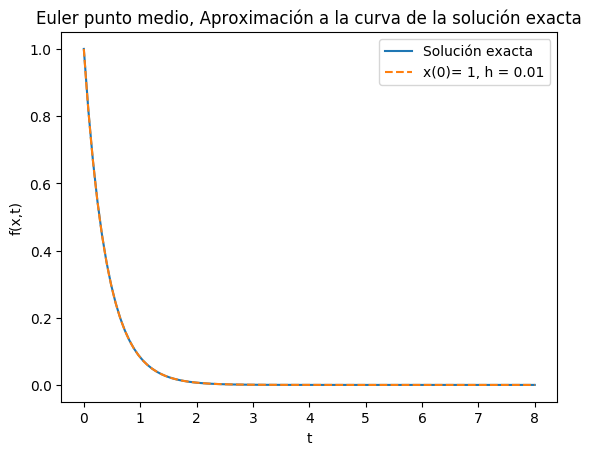

In [7]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(x,t)")
title("Euler punto medio, Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(euler_punto_medio(f,1,0,8,0.01)[1],euler_punto_medio(f,1,0,8,0.01)[2],"--", label = "x(0)= 1, h = 0.01");
legend()
show()

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(t_n,x_n),\\
k_2&=f(t_{n+1/2},x_n+\frac{h}{2}k_1),\\
k_3&=f(t_{n+1/2},x_n+\frac{h}{2}k_2),\\
k_4&=f(t_n,x_n+h k_3).\\
\end{align*}

In [8]:
#Lo mismo que lo anterior, sin embargo, necesitamos aplicar todas las formulas de la parte de arriba:

function runge_kutta_4(f,x0,t0,tf,h)
    n=round((tf-t0)/h)+1               
    listt=linspace(t0,tf,n) 
    listx=zeros(n)  
    listx[1] = x0 
    for i in 1:length(listx)-1
        k1 = f(listx[i], listt[i])
        k2 = f(listx[i] + h*(k1)/2, listt[i+1])
        k3 = f(listx[i] + h*(k2)/2, listt[i+1])
        k4 = f(listx[i] + h*(k3), listt[i],)
        listx[i+1] = listx[i] + h/6*(k1 + 2*(k2) + 2*(k3) + k4)         #Def de Runge Kutta orden 4
    end
    return listt,listx
end;

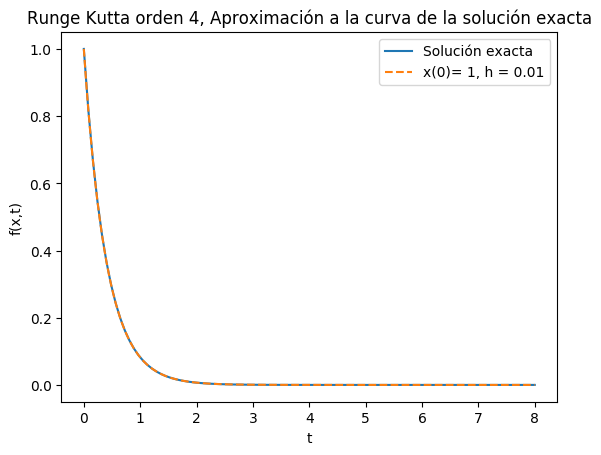

In [9]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(x,t)")
title("Runge Kutta orden 4, Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(runge_kutta_4(f,1,0,8,.01)[1],runge_kutta_4(f,1,0,8,0.01)[2],"--", label = "x(0)= 1, h = 0.01");
legend()
show()

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

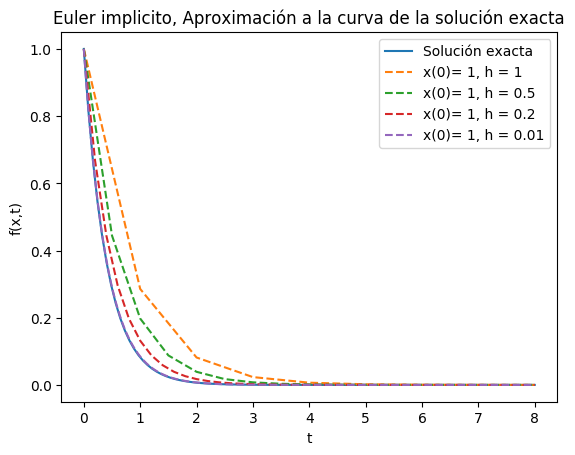

In [10]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(x,t)")
title("Euler implicito, Aproximación a la curva de la solución exacta")
plot(t,q(1,t),label="Solución exacta");
plot(euler_implicito(f,df,1,0,8,1)[1],euler_implicito(f,df,1,0,8,1)[2],"--", label = "x(0)= 1, h = 1");
plot(euler_implicito(f,df,1,0,8,0.5)[1],euler_implicito(f,df,1,0,8,.5)[2],"--", label = "x(0)= 1, h = 0.5");
plot(euler_implicito(f,df,1,0,8,0.2)[1],euler_implicito(f,df,1,0,8,0.2)[2],"--", label = "x(0)= 1, h = 0.2");
plot(euler_implicito(f,df,1,0,8,0.01)[1],euler_implicito(f,df,1,0,8,0.01)[2],"--", label = "x(0)= 1, h = 0.01");
legend()
show()

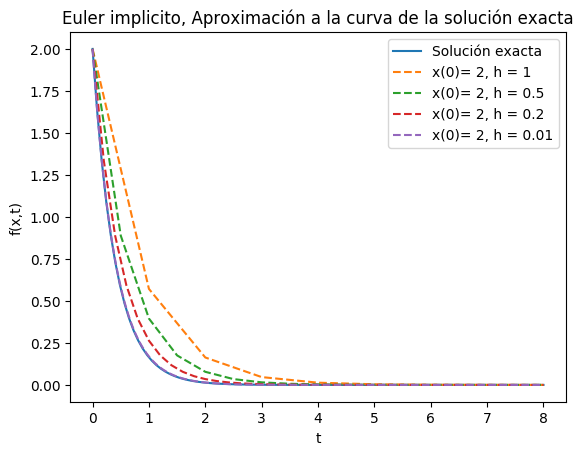

In [11]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(x,t)")
title("Euler implicito, Aproximación a la curva de la solución exacta")
plot(t,2q(1,t),label="Solución exacta");
plot(euler_implicito(f,df,2,0,8,1)[1],euler_implicito(f,df,2,0,8,1)[2],"--", label = "x(0)= 2, h = 1");
plot(euler_implicito(f,df,2,0,8,0.5)[1],euler_implicito(f,df,2,0,8,.5)[2],"--", label = "x(0)= 2, h = 0.5");
plot(euler_implicito(f,df,2,0,8,0.2)[1],euler_implicito(f,df,2,0,8,0.2)[2],"--", label = "x(0)= 2, h = 0.2");
plot(euler_implicito(f,df,2,0,8,0.01)[1],euler_implicito(f,df,2,0,8,0.01)[2],"--", label = "x(0)= 2, h = 0.01");
legend()
show()

#### A gran diferencia de lo que hicimos en la tarea 11, cuando h=1 con metodo de euler implicito tenemos que si hay convergencia con la solucion exacta, no como con el otro metodo, donde cuando h=1 esa "curva" oscilaba entre la solucion exacta. Por ello podemos decir que Euler implicito es más confiable.

__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

In [12]:
function ecuacion_resolver(x,t)
    return (2x-18t)/(1+t);
end;

In [13]:
function solucion_exacta_e_resolver(t)
    return 4+8*t-5*(t*t);
end;

In [14]:
(t1, x1) = runge_kutta_4(ecuacion_resolver, 4.0, 0.0, 8.0, 0.01);
(t2, x2) = euler_punto_medio(ecuacion_resolver, 4.0, 0.0, 8.0, 0.01);

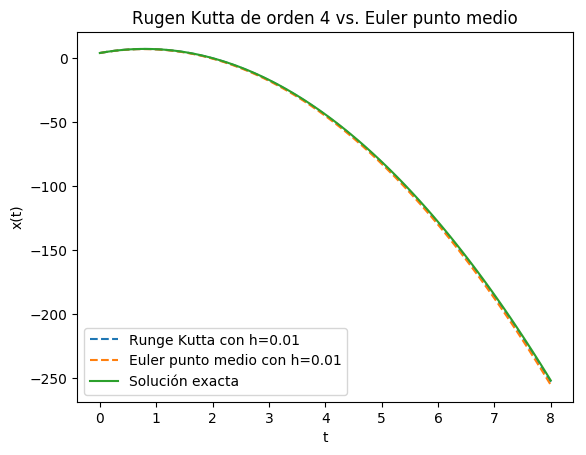

In [15]:
#Se grafican las cuatro soluciones numéricas y la solución teórica
t = linspace(0,8,100)
xlabel("t");
ylabel("x(t)");
title("Rugen Kutta de orden 4 vs. Euler punto medio");
plot(t1, x1, label="Runge Kutta con h=0.01","--");
plot(t2, x2, label="Euler punto medio con h=0.01","--");
plot(t, solucion_exacta_e_resolver.(t), label="Solución exacta");

legend();

__Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

__Nota:__ Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).

__Nota:__ Usen $h=0.1$ para hacer la comparación o cualquier otro que refleje una diferencia significativa entre los dos métodos en la energía, el chiste es no usar un $h$ muy pequeño.

In [16]:
#Vamos a usar el codigo que David hizo para sistemas de más de una dimensión, vamos a usar todo el metodo como esta explicado en el notebook

function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end;

In [17]:
#Nos vamos a basar en el codigo de David para hacer el de Kutta para más de dos dimensiones:

function runge_kutta_dimensiones(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end;

#### Las siguientes dos celdas son copy-paste de la tarea 11, solo cambiamos h = 0.1

In [18]:
#La función que queremos resolver.
f(x,t)=[x[2], -1.0*x[1]]

#Ponemos el intervalo donde queremos que lo grafique, [0,8]
list=0:0.1:8;

#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=0 y u(0)=2
soluciones_condiciones_iniciales=euler(f,list,[0,2]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1=map(x->x[1],soluciones_condiciones_iniciales);
listx2=map(x->x[2],soluciones_condiciones_iniciales);
listx_solucion_teorica=2*sin.(list); 
listx_derivada_solucion_teorica=2*cos.(list);

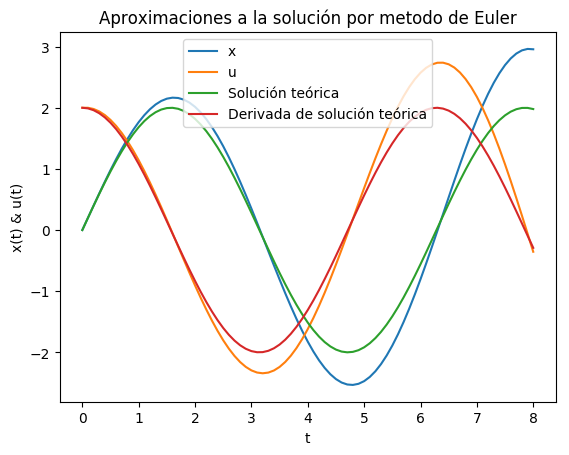

In [19]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución por metodo de Euler")
plot(list,listx1, label="x");
plot(list,listx2, label="u");
plot(list,listx_solucion_teorica, label="Solución teórica");
plot(list,listx_derivada_solucion_teorica, label="Derivada de solución teórica");
legend();

In [20]:
#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=0 y u(0)=2
soluciones_condiciones_iniciales=runge_kutta_dimensiones(f,list,[0,2]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales);
listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales);
listx_solucion_teorica=2*sin.(list); 
listx_derivada_solucion_teorica=2*cos.(list);

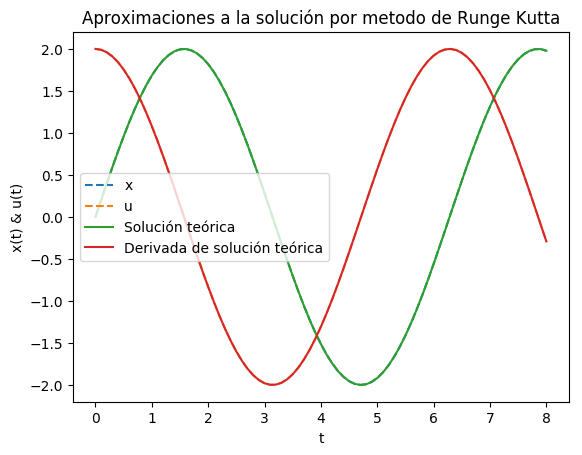

In [21]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución por metodo de Runge Kutta")
plot(list,listx1_kutta, label="x", "--");
plot(list,listx2_kutta, label="u", "--");
plot(list,listx_solucion_teorica, label="Solución teórica");
plot(list,listx_derivada_solucion_teorica, label="Derivada de solución teórica");
legend();

In [22]:
#Vamos a tener una energía constante con las condiciones iniciales x(0)=0 y u(0)=2
function energia_constante(x,y)
    return 2
end;

#Y tambien:
function energia(x,y)
    return  0.5*x*x+0.5y*y
end;

#Solo para vernos fancy podemos graficar estas tambien jiji:
function e_c(x,y)
    return  0.5*x*x
end;

function e_p(x,y)
    return  0.5*y*y
end;

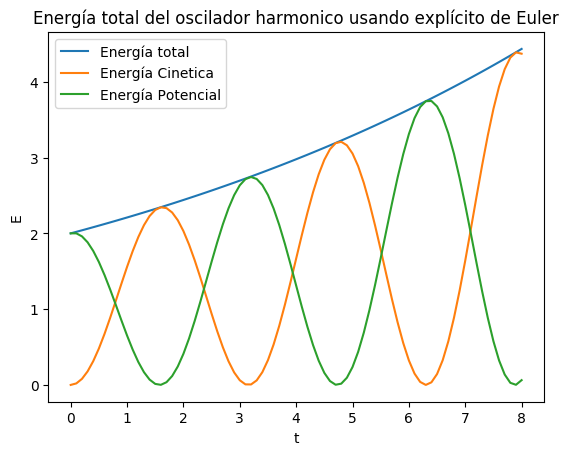

In [23]:
#Finalmente graficamos:
xlabel("t")
ylabel("E")
title("Energía total del oscilador harmonico usando explícito de Euler")
plot(list,energia.(listx1, listx2), label="Energía total");
plot(list,e_c.(listx1,listx2), label="Energía Cinetica");
plot(list,e_p.(listx1,listx2), label="Energía Potencial");
legend();

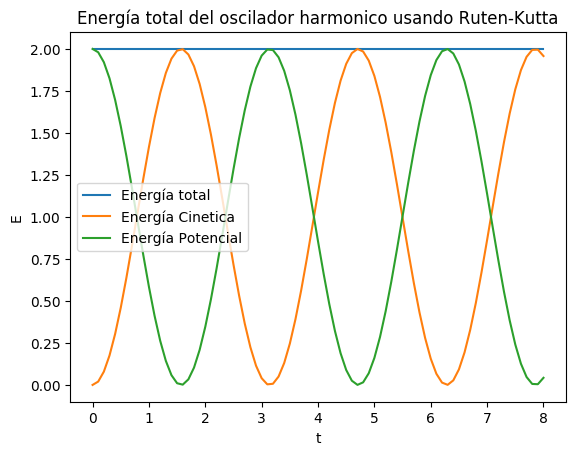

In [24]:
xlabel("t")
ylabel("E")
title("Energía total del oscilador harmonico usando Ruten-Kutta")
plot(list,energia_constante.(listx1, listx2), label="Energía total");
plot(list,e_c.(listx1_kutta,listx2_kutta), label="Energía Cinetica");
plot(list,e_p.(listx1_kutta,listx2_kutta), label="Energía Potencial");
legend();

__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 
__Nota:__ Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos `listx` y `listv`, bastará con hacer `plot(listx,listv)`.

In [25]:
#Esta parte es más que nada tediosa porque son puros copy-paste de lo que ya hemos hecho x.x
#Ponemos el intervalo donde queremos que lo grafique, [0,100]
lista=0:0.01:100;

#Necesitamos hacer una lista para guardar las soluciones con condiciones iniciales x(0)=0 y u(0)=2
soluciones_condiciones_iniciales_euler=euler(f,lista,[0,2]);
soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(f,lista,[0,2]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1_euler=map(x->x[1],soluciones_condiciones_iniciales_euler);
listx2_euler=map(x->x[2],soluciones_condiciones_iniciales_euler);
listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
listx_solucion_teorica=2*sin.(lista); 
listx_derivada_solucion_teorica=2*cos.(lista);

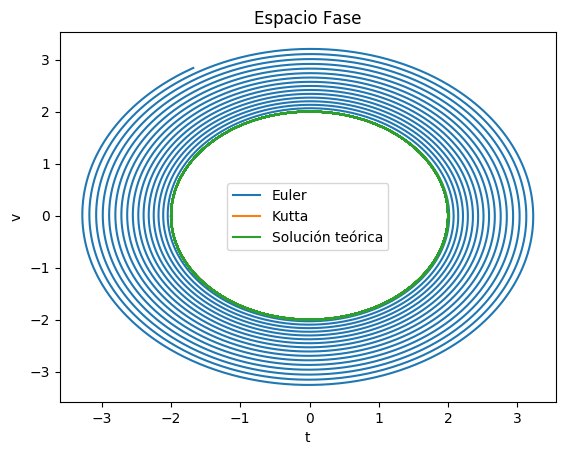

In [26]:
#finalmente graficamos:
xlabel("t")
ylabel("v")
title("Espacio Fase")
plot(listx1_euler,listx2_euler, label="Euler");
plot(listx1_kutta,listx2_kutta, label="Kutta");
plot(listx_solucion_teorica,listx_derivada_solucion_teorica, label="Solución teórica");
legend();

__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

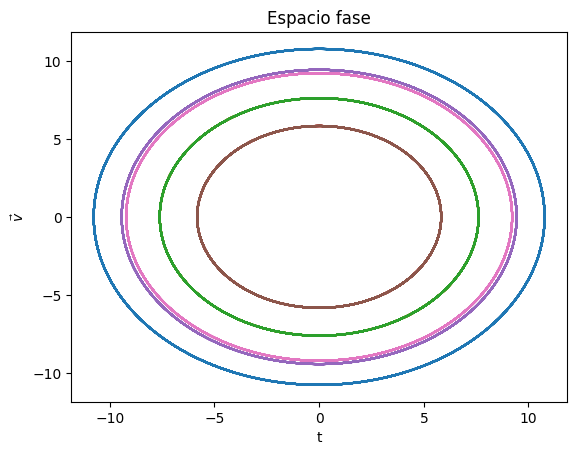

In [27]:
#Como nos dio flojera poner cada una de las condiciones iniciales mejor que el programa las escoja solito :v

randoms1=[rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0)]
randoms2=[rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0)]

for i in 1:length(randoms1)
    soluciones_condiciones_iniciales_kutta=runge_kutta_dimensiones(f,lista,[randoms1[i],randoms2[i]]);
    listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    
    xlabel("t")
    ylabel(L"\vec{v}")   
    title("Espacio fase")
    plot(listx1_kutta,listx2_kutta);
end;